In [73]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return x**2 + np.cos(x)

def dfunc(x):
    return 2*x - np.sin(x)

def paramshift(func, x, r, phi):
    return r*(func(x + phi) - func(x - phi))

nr = 100
ns = 100
rs = np.linspace(-10,10, nr)
ss = np.linspace(-5,5, ns)
min_fidelity, gradient_of_min_fidelity, min_r, min_phase = 10000000000, 0, 0, 0
fidelity = []
errors = np.ones((nr, ns))
for i in range(0, nr):
    for j in range(0, ns):
        x = np.random.normal(10, 5)
        gradient = dfunc(x)
        psuedogradient = paramshift(func, x, rs[i], ss[j])
        error = np.abs(gradient - psuedogradient)
        errors[i, j] = error
        if error < min_fidelity: 
            min_fidelity = error
            gradient_of_min_fidelity = gradient
            min_r = rs[i]
            min_phase = ss[i]



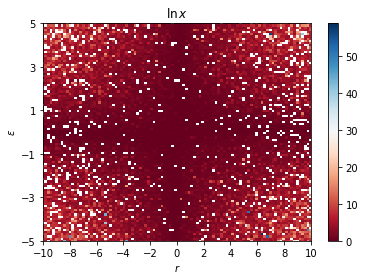

In [54]:
fig, ax = plt.subplots()
c = ax.pcolormesh(rs, ss, errors, cmap='RdBu', vmin=0, vmax=np.nanmax(errors))
ax.set_title('$\ln x$')
ax.axis([np.min(rs), np.max(rs), np.min(ss),np.max(ss)])
plt.xlabel('$r$')
plt.ylabel('$\epsilon$')
plt.xticks(range(-10, 12, 2))
plt.yticks(range(-5, 6, 2))
fig.colorbar(c, ax=ax)
plt.savefig('logx.eps', format = 'eps')

In [77]:
nrs = list(range(1, 51))
nss = list(range(1, 51))
min_fidilities = np.ones((50, 50))
for nr in nrs: 
    for ns in nss:
        rs = np.linspace(-10,10, nr)
        ss = np.linspace(-5,5, ns)
        min_fidelity, gradient_of_min_fidelity, min_r, min_phase = 10000000000, 0, 0, 0
        fidelity = []
        errors = np.ones((nr, ns))
        for i in range(0, nr):
            for j in range(0, ns):
                x = np.random.normal(10, 5)
                gradient = dfunc(x)
                psuedogradient = paramshift(func, x, rs[i], ss[j])
                error = np.abs(gradient - psuedogradient)
                errors[i, j] = error
                if error < min_fidelity: 
                    min_fidelity = error
                    gradient_of_min_fidelity = gradient
                    min_r = rs[i]
                    min_phase = ss[j]
        min_fidilities[nr - 1, ns - 1] = min_fidelity

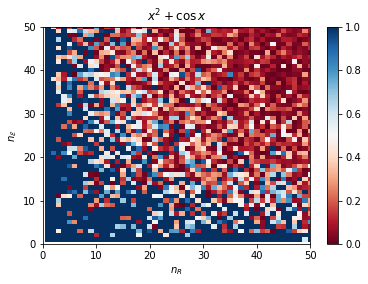

In [83]:

fig, ax = plt.subplots()

c = ax.pcolormesh(nrs, nss, min_fidilities, cmap='RdBu', vmin=0, vmax=1)
ax.set_title('$x^2 + \cos x $')
# set the limits of the plot to the limits of the data
ax.axis([np.min(nrs), np.max(nrs), np.min(nss),np.max(nss)])
plt.xlabel('$n_R$')
plt.ylabel('$n_{\mathcal{E}}$')
plt.xticks(range(0, 51, 10))
plt.yticks(range(0, 51, 10))
fig.colorbar(c, ax=ax)
plt.savefig('share.eps', format = 'eps')

In [ ]:
ae = []
re = []
reals = []
fakes = []
for i in range(0, 100):
    x = np.random.normal(10, 5)
    reals.append(dfunc(x))
    fakes.append(paramshift(func, x, min_r, min_phase))
    re.append(np.abs(dfunc(x)-paramshift(func, x, min_r, min_phase))/(dfunc(x)))
plt.plot(range(0,100), reals, label="Exact gradient")
plt.plot(range(0,100), fakes, label="Approximate gradient")
plt.legend(loc='lower left', borderaxespad=0.)
plt.show()
print(min_r)
print(min_phase)
print(min_fidelity)
print(np.average(re))
